# COMP4331 Assignment 1

## Preparing the dataset

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [2]:
# load "forestfires.csv" into a pandas dataframe
df = pd.read_csv("forestfires.csv", sep = ',')

In [3]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Task 1. Basic Summary

The mean, standard deviation, mode, median, and five-number summary of the `RH` attribute is reported.

In [4]:
print("RH mean: ", df['RH'].mean())
print("RH standard deviation: ", df['RH'].std())
print("RH mode: ", df['RH'].mode())
print("RH median: ", df['RH'].median())
print("RH five-number summary: ", df['RH'].describe())

RH mean:  44.28820116054158
RH standard deviation:  16.317469239378394
RH mode:  0    27
dtype: int64
RH median:  42.0
RH five-number summary:  count    517.000000
mean      44.288201
std       16.317469
min       15.000000
25%       33.000000
50%       42.000000
75%       53.000000
max      100.000000
Name: RH, dtype: float64


In [5]:
# find the highest occurrence of RH
df['RH'].value_counts().head(1)

27    33
Name: RH, dtype: int64

The mean, standard deviation, mode, median, and five-number summary of the `wind` attribute is reported.

In [6]:
print("wind mean: ", df['wind'].mean())
print("wind standard deviation: ", df['wind'].std())
print("wind mode: ", df['wind'].mode())
print("wind median: ", df['wind'].median())
print("wind five-number summary: ", df['wind'].describe())

wind mean:  4.017601547388782
wind standard deviation:  1.7916526009464604
wind mode:  0    2.2
1    3.1
dtype: float64
wind median:  4.0
wind five-number summary:  count    517.000000
mean       4.017602
std        1.791653
min        0.400000
25%        2.700000
50%        4.000000
75%        4.900000
max        9.400000
Name: wind, dtype: float64


## Task 2. Box Plot

### Part A: Boxplot for `RH` attribute

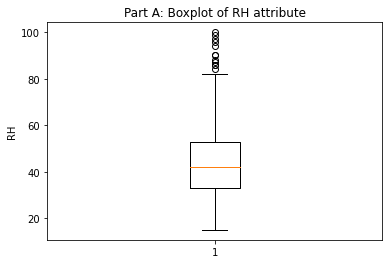

In [7]:
# boxplot for RH attribute
plt.boxplot(df['RH'])
plt.title("Part A: Boxplot of RH attribute")
plt.ylabel("RH")
plt.show()

### Part B: Boxplot for `RH` attribute for various values of month

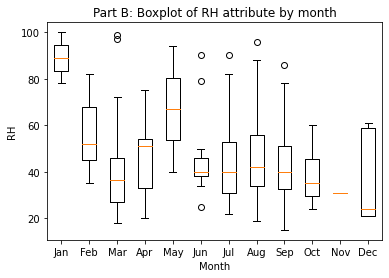

In [8]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# iterate through months
plt.figure()
plt.boxplot([ df['RH'][df.month == m ] for m in months ])
plt.title("Part B: Boxplot of RH attribute by month")
plt.xticks(range(1,13), [ m.capitalize() for m in months ])
plt.xlabel("Month")
plt.ylabel("RH")
plt.show()

### Part C: Boxplot for `RH` attribute with various values of day

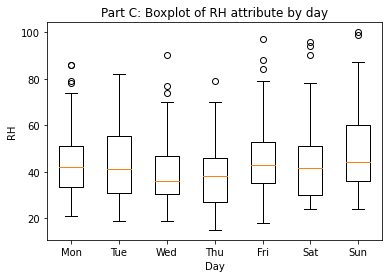

In [9]:
# create list of days
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# iterate through days
plt.figure()
plt.boxplot([ df['RH'][df.day == d] for d in days ])
plt.title("Part C: Boxplot of RH attribute by day")
plt.xticks(range(1,8), [ d.capitalize() for d in days ])
plt.xlabel("Day")
plt.ylabel("RH")
plt.show()

## Task 3. Hist Plot

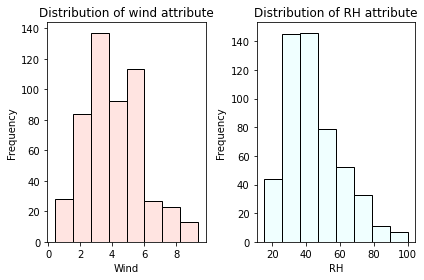

In [10]:
plt.figure()

# create histogram for wind attribute
plt.subplot(1, 2, 1)
plt.hist(df['wind'], bins = 8, color = "mistyrose", ec = "black")
plt.title("Distribution of wind attribute")
plt.xlabel("Wind")
plt.ylabel("Frequency")

# create histogram for RH attribute
plt.subplot(1, 2, 2)
plt.hist(df['RH'], bins = 8, color = "azure", ec = "black")
plt.title("Distribution of RH attribute")
plt.xlabel("RH")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Task 4. Scatter Plot

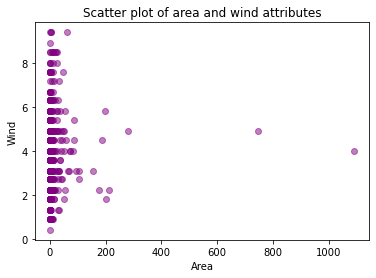

In [11]:
# create scatter plot between area and wind attributes
plt.scatter(df['area'], df['wind'], color = "purple", marker = "o", alpha = 0.5)
plt.title("Scatter plot of area and wind attributes")
plt.xlabel("Area")
plt.ylabel("Wind")
plt.show()

In [12]:
# calculate correlation coefficient between area and wind attributes
print("Correlation coefficient:", df['area'].corr(df['wind']))

Correlation coefficient: 0.012317276888673111


## Task 5. Correlation

In [13]:
attributes = [ "FFMC", "DMC", "DC", "ISI", "RH", "wind" ]
df[attributes].corrwith(df['area']).apply(abs).sort_values(ascending = False).head(3)

RH     0.075519
DMC    0.072994
DC     0.049383
dtype: float64

In [14]:
df[attributes].corrwith(df['area'])

FFMC    0.040122
DMC     0.072994
DC      0.049383
ISI     0.008258
RH     -0.075519
wind    0.012317
dtype: float64

## Task 6. $\chi^2$-Test

In [15]:
significance_level = 0.01

### Part A: Dependency between `temp` and `wind` attributes

In [16]:
# split entries into whether `temp` and `wind` are greater than or equal to their respective means
df_temp_wind = pd.DataFrame()
df_temp_wind['temp_ge_mean'] = df['temp'] >= df['temp'].mean()
df_temp_wind['wind_ge_mean'] = df['wind'] >= df['wind'].mean()
df_temp_wind.head()

,temp_ge_mean,wind_ge_mean
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False


In [17]:
# create crosstab of `temp_ge_mean` and `wind_ge_mean`
crosstab = pd.crosstab(df_temp_wind['temp_ge_mean'], df_temp_wind['wind_ge_mean'])
crosstab

wind_ge_mean,False,True
temp_ge_mean,,
False,125,112
True,175,105


In [18]:
# perform chi square test for independence between `temp` and `wind` attributes
chi2, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print("Chi-squared test:")
print("\tchi2:", chi2)
print("\tp:", p)
print("\tdof:", dof)

Chi-squared test:
	chi2: 4.6248223286218
	p: 0.031512524845180044
	dof: 1


In [19]:
expected

array([[137.52417795,  99.47582205],
       [162.47582205, 117.52417795]])

In [52]:
# find critical value
critical_value = scipy.stats.chi2.ppf(q = 1 - significance_level, df = dof)
print("Critical value:", critical_value)

# determine if null hypothesis is rejected
if chi2 >= critical_value:
    print("Null hypothesis is rejected. There is a relationship between `temp` and `wind` attributes.")
else:
    print("Null hypothesis is not rejected. There is no significant relationship between `temp` and `wind` attributes.")

Critical value: 6.6348966010212145
Null hypothesis is rejected. There is a relationship between `temp` and `wind` attributes.


### Part B: Dependency between `X` and `Y` attributes

In [21]:
# split entries into whether `X` and `Y` are greater than or equal to their respective means
df_X_Y = pd.DataFrame()
df_X_Y['X_ge_mean'] = df['X'] >= df['X'].mean()
df_X_Y['Y_ge_mean'] = df['Y'] >= df['Y'].mean()
df_X_Y.head()

,X_ge_mean,Y_ge_mean
0,True,True
1,True,False
2,True,False
3,True,True
4,True,True


In [22]:
# create crosstab of `X_ge_mean` and `Y_ge_mean`
crosstab = pd.crosstab(df_X_Y['X_ge_mean'], df_X_Y['Y_ge_mean'])
crosstab

Y_ge_mean,False,True
X_ge_mean,,
False,199,68
True,112,138


In [23]:
# perform chi square test for independence between `X` and `Y` attributes
chi2, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print("Chi-squared test:")
print("\tchi2:", chi2)
print("\tp:", p)
print("\tdof:", dof)

Chi-squared test:
	chi2: 46.3841585605598
	p: 9.719816977512204e-12
	dof: 1


In [24]:
expected

array([[160.6131528, 106.3868472],
       [150.3868472,  99.6131528]])

In [25]:
# find critical value
critical_value = scipy.stats.chi2.ppf(q = 1 - significance_level, df = dof)
print("Critical value:", critical_value)

# determine if null hypothesis is rejected
if chi2 >= critical_value:
    print("Null hypothesis is rejected. There is a relationship between `X` and `Y` attributes.")
else:
    print("Null hypothesis is not rejected. There is no significant relationship between `X` and `Y` attributes.")

Critical value: 6.6348966010212145
Null hypothesis is rejected. There is a relationship between `X` and `Y` attributes.


## Task 7. Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Part A: Normalize attribute `FFMC`

In [27]:
# original dataframe
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [28]:
# normalize attribute `FFMC` between 0 and 1 with min-max normalization
min_max_scaler = MinMaxScaler()
df['FFMC'] = min_max_scaler.fit_transform(df['FFMC'].values.reshape(-1, 1))


In [29]:
# dataframe after normalization of `FFMC` attribute
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,0.870968,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,0.927742,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,0.927742,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,0.941935,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,0.910968,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,0.949677,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,0.949677,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,0.939355,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,0.932903,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,0.952258,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [30]:
print("Max: {}\tMin: {}".format(df['FFMC'].max(), df['FFMC'].min()))

Max: 1.0	Min: 0.0


### Part B: Normalize attributes `DC`, `ISI`, `temp`, `RH`, and `wind`

In [31]:
# normalize attributes `DC`, `ISI`, `temp`, `RH`, and `wind` to mean zero and standard deviation one using z-score normalization
standard_scaler = StandardScaler()
for attribute in [ "DC", "ISI", "temp", "RH", "wind" ]:
    df[attribute] = standard_scaler.fit_transform(df[attribute].values.reshape(-1, 1))

In [32]:
# dataframe after normalization of `DC`, `ISI`, `temp`, `RH`, and `wind` attributes
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,0.870968,26.2,-1.830477,-0.860946,-1.842640,0.411724,1.498614,0.0,0.0
1,7,4,oct,tue,0.927742,35.4,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,0.0,0.0
2,7,4,oct,sat,0.927742,43.7,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,0.0,0.0
3,8,6,mar,fri,0.941935,33.3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.2,0.0
4,8,6,mar,sun,0.910968,51.3,-1.798600,0.126966,-1.291012,3.356206,-1.238940,0.0,0.0
5,8,6,aug,sun,0.949677,85.3,-0.241863,1.246598,0.570734,-0.937830,0.772325,0.0,0.0
6,8,6,aug,mon,0.949677,88.9,-0.211197,-0.114524,0.898263,-1.060516,-0.512650,0.0,0.0
7,8,6,aug,mon,0.939355,145.4,0.243154,0.368455,-1.877117,2.558742,-1.015466,0.0,0.0
8,8,6,sep,tue,0.932903,129.5,0.583715,-0.443828,-0.997959,1.147845,0.772325,0.0,0.0
9,7,5,sep,sat,0.952258,88.0,0.607926,-0.421874,0.674164,-0.263053,-0.009834,0.0,0.0


### Part C: Export to CSV file

In [33]:
# output dataframe to CSV file titled "data_normalized.csv" with ',' as delimitter
df.to_csv("data_normalized.csv", sep = ",", index = False)

## Task 8. PCA

### Part A: Plot the cumulative explained variance ratio

In [34]:
from sklearn.decomposition import PCA

In [35]:
# only the attributes `DC`, `ISI`, `temp`, `RH`, and `wind` are used
pca_df = df[['DC', 'ISI', 'temp', 'RH', 'wind']]
pca_df.head(10)

,DC,ISI,temp,RH,wind
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940
5,-0.241863,1.246598,0.570734,-0.937830,0.772325
6,-0.211197,-0.114524,0.898263,-1.060516,-0.512650
7,0.243154,0.368455,-1.877117,2.558742,-1.015466
8,0.583715,-0.443828,-0.997959,1.147845,0.772325
9,0.607926,-0.421874,0.674164,-0.263053,-0.009834


In [36]:
# create PCA object with 5 components
pca = PCA(n_components = 5)
principal_components = pca.fit_transform(pca_df)
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)
print("Explained ratio:", pca.explained_variance_ratio_) # eigenvalue/eigenvalue.sum() also works

Eigenvalues: [2.01883108 1.11358567 0.98519395 0.62366511 0.2684141 ]
Explained ratio: [0.40298524 0.22228635 0.19665767 0.12449176 0.05357899]


In [37]:
# store cumulative explained variance ratio in a list
explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print("Cumulative explained ratio:", explain_ratio)

Cumulative explained ratio: [0.4  0.63 0.82 0.95 1.  ]


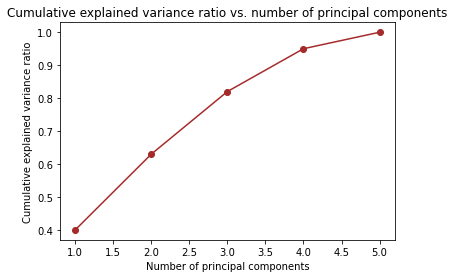

In [38]:
# plot the cumulative explained variance ratio against the number of principal components
plt.plot(range(1, 6), explain_ratio, color = "brown", marker = "o")
plt.title("Cumulative explained variance ratio vs. number of principal components")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

### Part B: Transform the data by PCA

In [53]:
# instantiate pca with 4 principal components
pca = PCA(n_components = 4)
principal_components = pca.fit_transform(pca_df)

In [58]:
pca_df.shape

(517, 5)

In [54]:
principal_components

array([[ 2.8707736 ,  1.03818095, -0.7376921 , -0.14817976],
       [-0.61154381, -1.67368952, -0.50651348,  0.29561033],
       [-0.21779758, -1.52025609, -0.39796623,  0.19105366],
       ...,
       [ 1.12143505,  0.01778857,  0.94673927, -1.87987336],
       [-1.1215933 ,  0.24343415,  0.10343671,  0.0450668 ],
       [ 1.99853102, -0.24129206, -2.0624634 , -0.27181027]])

In [59]:
principal_components.shape

(517, 4)

### Part C: Export to CSV

In [41]:
# create dataframe of principal components
principal_df = pd.DataFrame(data = principal_components, columns = [ "PC1", "PC2", "PC3", "PC4" ])
principal_df.head(10)

,PC1,PC2,PC3,PC4
0,2.870774,1.038181,-0.737692,-0.148180
1,-0.611544,-1.673690,-0.506513,0.295610
2,-0.217798,-1.520256,-0.397966,0.191054
3,3.400801,-0.095649,1.557776,1.614286
4,2.735682,-1.035390,1.632195,2.279629
5,-0.953128,1.491433,-0.419398,0.308684
6,-0.993609,-0.256308,-1.067444,0.096842
7,1.792678,-1.064583,2.310779,1.168650
8,1.195205,0.064354,1.168519,-0.765451
9,-0.664072,-0.321027,-0.074793,-0.681663


In [42]:
# export dataframe to CSV file titled "data_reduced.csv" without header
principal_df.to_csv("data_reduced.csv", header = False, index = False)

In [43]:
# find five-number sumary for each principal component
principal_df.describe().round(2)

,PC1,PC2,PC3,PC4
count,517.00,517.00,517.00,517.00
mean,0.00,0.00,0.00,-0.00
std,1.42,1.06,0.99,0.79
min,-3.51,-2.67,-2.68,-1.94
25%,-0.95,-0.81,-0.65,-0.48
50%,-0.31,-0.14,0.02,-0.05
75%,0.90,0.76,0.63,0.48
max,4.43,6.15,3.63,7.02


## Task 9. Missing Values

The dataset is reloaded.

In [60]:
# reload the dataset
df = pd.read_csv("forestfires.csv", sep = ',')

In [61]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


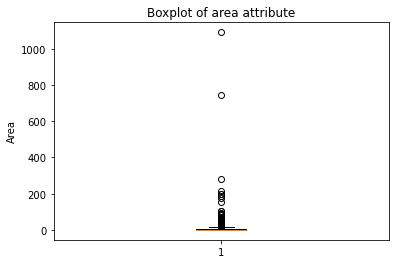

In [62]:
# create boxplot for `area` attribute
plt.boxplot(df['area'])
plt.title("Boxplot of area attribute")
plt.ylabel("Area")
plt.show()

In [63]:
# find correlation coefficient `wind` and `area` attributes
print("Correlation coefficient:", df['area'].corr(df['wind']))

Correlation coefficient: 0.012317276888673111


In [65]:
# calculate mean of `area` attribute without zeros
mean_area = df[df['area'] != 0]['area'].mean()
print("Mean:", mean_area)

Mean: 24.60018518518518


In [49]:
# replace values equal to 0 with the attribute mean
df.loc[df['area'] == 0, 'area'] = mean_area

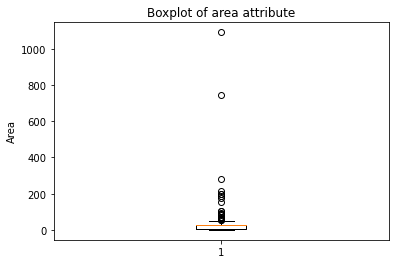

In [50]:
# create boxplot for `area` attribute again
plt.boxplot(df['area'])
plt.title("Boxplot of area attribute")
plt.ylabel("Area")
plt.show()

In [51]:
# find correlation coefficient `wind` and `area` attributes
print("Correlation coefficient:", df['area'].corr(df['wind']))

Correlation coefficient: 0.001584133376041119
